# MNIST 
Lets to train a mnist dataset with a simple neural network.

In [39]:
# 0) importing our libraries
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import datasets, transforms

In [40]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [52]:
# 1) Loading our dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((28, 28)),
                                transforms.Normalize((0.5,), (0.5,))
                                ])
training_dataset = datasets.MNIST(root='./data',
                                  train=True,
                                  download=True,
                                  transform=transform,
                                  ) 
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                              batch_size=100,
                                              shuffle=True
                                              )
validation_dataset = datasets.MNIST(root='./data',
                                    train=False, 
                                    download=True,
                                    transform=transform
                                    )
validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False
                                                )

In [53]:
# 2) Visualizing our data
data_iter = iter(training_loader)
images, labels = next(data_iter)
print(images.shape)

torch.Size([100, 1, 28, 28])


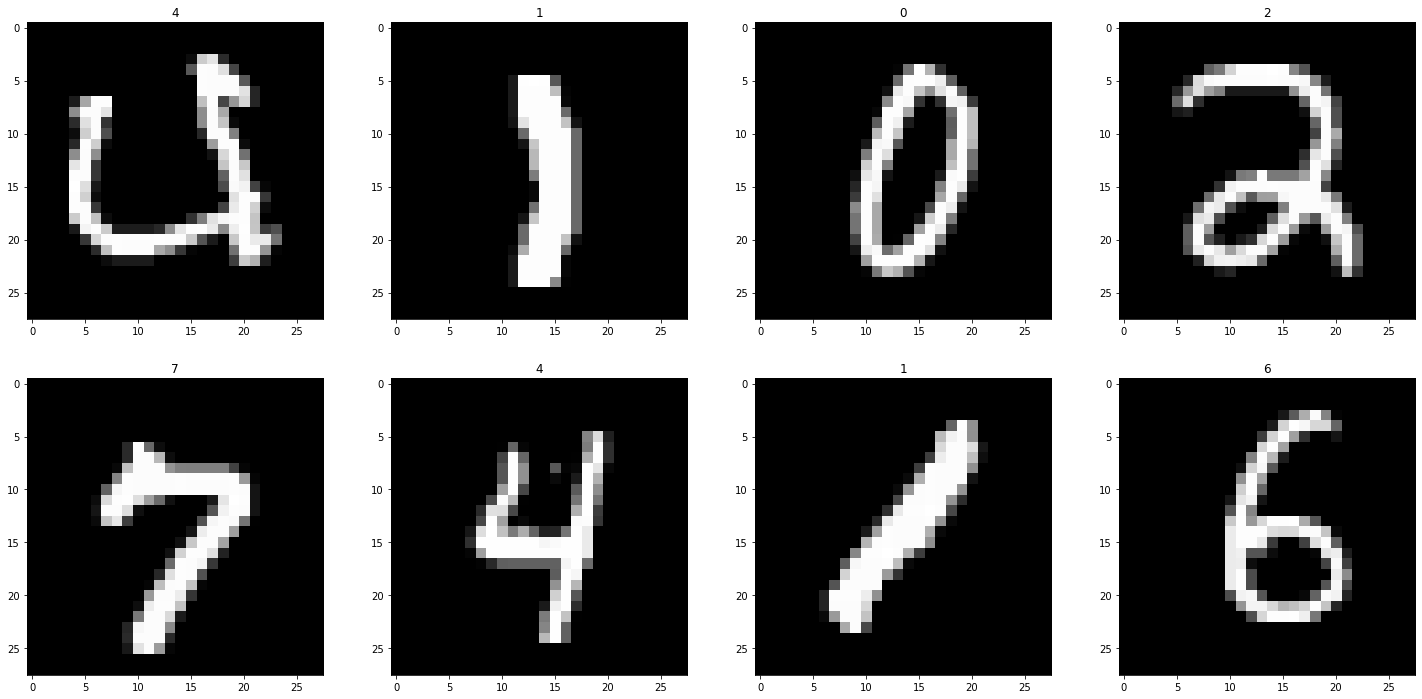

In [54]:
def image_converter(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image
    
fig = plt.figure(figsize=(25, 12))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_title(labels[i].item())
    plt.imshow(image_converter(images[i]))


In [61]:
# 3) Build the model
class MyMNIST(nn.Module):
    def __init__(self, input_size, H1, H2, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, output_size)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
model = MyMNIST(28*28, 500, 100, 10).to(device)
print(model)

MyMNIST(
  (linear1): Linear(in_features=784, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [70]:
# 4) Training the model

epochs = 16
losses_history = []
val_losses_history = []
accuracies_history = []
val_accuracies_history = []

for e in range(epochs):
    losses = 0.0
    accuracies = 0.0
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1).to(device)
        outputs = model(inputs).to(device)
        loss = criterion(outputs.cpu(), labels)
        
        losses += loss.item()
        _, max_indices = torch.max(outputs, 1)
        acc = torch.sum(max_indices.cpu() == labels) / labels.shape[0]
        accuracies += acc.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        
    else:
        epoch_loss = losses / len(training_loader)
        losses_history.append(epoch_loss)
        epoch_acc = accuracies / len(training_loader)
        accuracies_history.append(epoch_acc)
        
        
        with torch.no_grad():
            losses = 0.0
            accuracies = 0.0
            for inputs, labels in validation_loader:
                inputs = inputs.view(inputs.shape[0], -1).to(device)
                outputs = model(inputs).to(device)
                loss = criterion(outputs.cpu(), labels)
                
                losses += loss.item()
                _, max_indices = torch.max(outputs, 1)
                acc = torch.sum(max_indices.cpu() == labels) / labels.shape[0]
                accuracies += acc.item()
                
            val_epoch_loss = losses / len(validation_loader)
            val_losses_history.append(val_epoch_loss)
            val_epoch_acc = accuracies / len(validation_loader)
            val_accuracies_history.append(val_epoch_acc)
        
        print("epoch : {} = T_loss:{:.4f}, T_acc:{:.4f} || val_loss:{:.4f}, val_acc:{:.4f}".format(e,
                                                                                                  epoch_loss,
                                                                                                  epoch_acc,
                                                                                                  val_epoch_loss,
                                                                                                  val_epoch_acc))



epoch : 0 = T_loss:0.1650, T_acc:0.9519 || val_loss:0.1447, val_acc:0.9601
epoch : 1 = T_loss:0.1632, T_acc:0.9539 || val_loss:0.1905, val_acc:0.9491
epoch : 2 = T_loss:0.1609, T_acc:0.9557 || val_loss:0.2293, val_acc:0.9368
epoch : 3 = T_loss:0.1564, T_acc:0.9573 || val_loss:0.1982, val_acc:0.9461
epoch : 4 = T_loss:0.1598, T_acc:0.9575 || val_loss:0.1516, val_acc:0.9592
epoch : 5 = T_loss:0.1477, T_acc:0.9606 || val_loss:0.1618, val_acc:0.9619
epoch : 6 = T_loss:0.1372, T_acc:0.9634 || val_loss:0.2258, val_acc:0.9453
epoch : 7 = T_loss:0.1393, T_acc:0.9635 || val_loss:0.1708, val_acc:0.9605
epoch : 8 = T_loss:0.1488, T_acc:0.9614 || val_loss:0.1886, val_acc:0.9526
epoch : 9 = T_loss:0.1367, T_acc:0.9649 || val_loss:0.1692, val_acc:0.9609
epoch : 10 = T_loss:0.1335, T_acc:0.9655 || val_loss:0.1868, val_acc:0.9594
epoch : 11 = T_loss:0.1361, T_acc:0.9658 || val_loss:0.1747, val_acc:0.9593
epoch : 12 = T_loss:0.1238, T_acc:0.9676 || val_loss:0.1690, val_acc:0.9599
epoch : 13 = T_loss:0.

In [47]:
a = torch.Tensor([[1], [2], [3], [4], [5], [6]])
print(a)
b = torch.Tensor([[1], [2], [2], [4], [5], [6]])
print(b)
c = torch.sum(a==b)
print(c)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[1.],
        [2.],
        [2.],
        [4.],
        [5.],
        [6.]])
tensor(5)


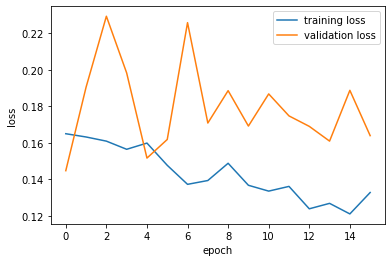

In [92]:
# 5) Plotting results
plt.plot(range(epochs), losses_history, label="training loss")
plt.plot(range(epochs), val_losses_history, label=("validation loss"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

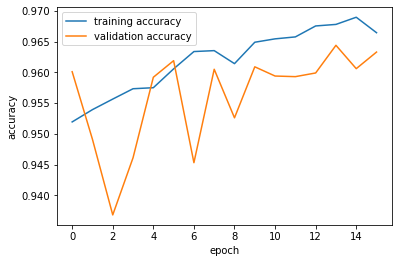

In [85]:
plt.plot(range(epochs), accuracies_history, label="training accuracy")
plt.plot(range(epochs), val_accuracies_history, label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [118]:
# 6 Tessting
data_iter = iter(validation_loader)
images, labels = next(data_iter)
inputs = images.view(images.shape[0], -1).to(device)
outputs = model(inputs)
_, preds = torch.max(outputs, 1)


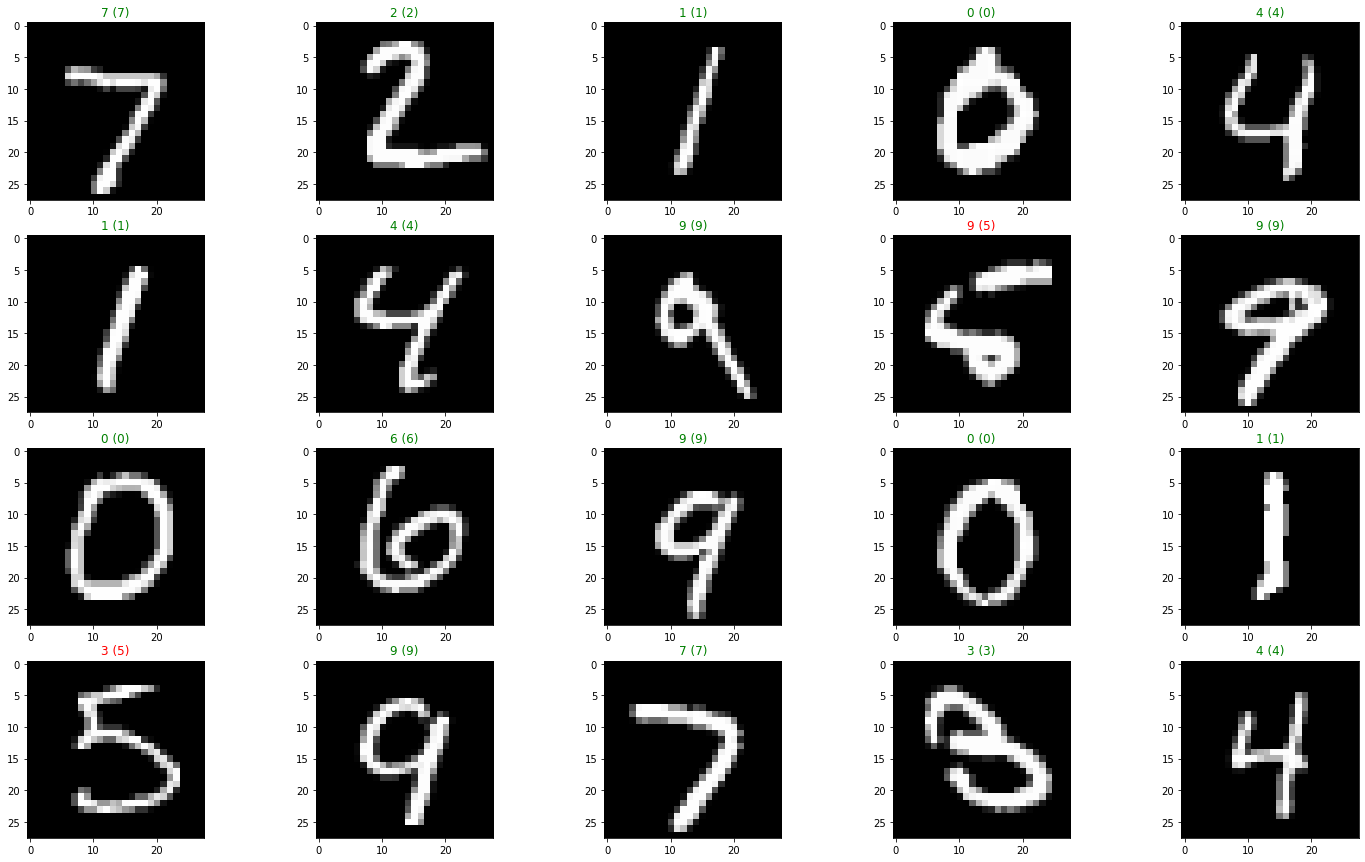

In [119]:

fig = plt.figure(figsize=(25, 15))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    plt.imshow(image_converter(images[i]))
    ax.set_title("{} ({})".format(preds[i].item(), labels[i].item()),
                 color="green" if preds[i]==labels[i] else "red")